<a href="https://colab.research.google.com/github/AnkitaDasData/AnalyticsHub/blob/main/Projects/Exploring_PySpark/Data_Analysis_Using_PySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PySpark is considered a powerful tool for data processing and analysis - PySpark integrates seamlessly with Python libraries and utilizes in-memory computation for fast data processing, making it highly effective for complex analyses.

# 4 learning objectives:

# 1.Setting up modules

# 2.Exploring functions

# 3.Applying different queries to dataset to extract useful Information

# 4.Visualization basics with matplotlib
  


# 1. Setting up modules

In [76]:
#MOUNTING FOLDER/LOCATION for files
# loading data
import os
from google.colab import drive

# Define the mount point and your directory path
mount_path = '/content/drive/MyDrive/AnalyticsHub/Projects/Exploring_PySpark'

# Unmount the drive first to avoid issues
if os.path.exists('/content/drive'):
    try:
        drive.flush_and_unmount()
        print("Successfully unmounted the drive.")
    except:
        print("Drive not mounted, skipping unmount step.")

# Now, remove any existing files from the mount point if needed
if os.path.exists('/content/drive'):
    try:
        os.system('rm -rf /content/drive')
        print("Cleared the existing mount point.")
    except Exception as e:
        print(f"Error clearing mount point: {e}")

# Remount Google Drive
try:
    drive.mount('/content/drive', force_remount=True)  # Mount the drive
    print("Google Drive mounted successfully.")

    # Create the target directory if it doesn't exist
    if not os.path.exists(mount_path):
        os.makedirs(mount_path)
        print(f"Created directory: {mount_path}")
except ValueError as e:
    print(f"Failed to mount Google Drive: {e}")



Successfully unmounted the drive.
Mounted at /content/drive
Google Drive mounted successfully.


In [77]:
# INSTALLING PYSPARK
!pip install pyspark

In [78]:
# IMPORTING MODULES
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max , asc, sum , struct, when, countDistinct, broadcast
import matplotlib.pyplot as plts

In [79]:
# CREATING SPARK SESSION
spark = SparkSession.builder.appName("spark_app").getOrCreate()

In [80]:
# IMPRORTING Listening DATA
# Listenings.csv
listeningcsv_path = '/content/drive/MyDrive/AnalyticsHub/Projects/Exploring_PySpark/listenings.csv'

# Check if file exists
if not os.path.exists(listeningcsv_path):
    raise FileNotFoundError(f"File not found: {listeningcsv_path}")

# Load the data
listening_df = spark.read\
    .format('csv') \
    .option('inferSchema', True)\
    .option('header', True)\
    .load(listeningcsv_path)

In [81]:
# EXPLORING Listening DATA
listening_df.show()
# pyspark dataframe is not identical to pandas dataframe

+-----------+-------------+--------------------+---------------+--------------------+
|    user_id|         date|               track|         artist|               album|
+-----------+-------------+--------------------+---------------+--------------------+
|000Silenced|1299680100000|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|          Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|      Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      

In [82]:
#ignoring data in date column / DROPPING COLUMNS
listening_df = listening_df.drop('date')


In [83]:
# ignoring data values null / DROPPING ROWS
listening_df = listening_df.na.drop()


In [84]:
#check metadata
listening_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



In [85]:
listening_df.isEmpty()

False

In [86]:
listening_df.columns

['user_id', 'track', 'artist', 'album']

In [87]:
listening_df.count()

13758905

In [88]:
listening_df.head(5)

[Row(user_id='000Silenced', track='Price Tag', artist='Jessie J', album='Who You Are'),
 Row(user_id='000Silenced', track='Price Tag (Acoustic Version)', artist='Jessie J', album='Price Tag'),
 Row(user_id='000Silenced', track='Be Mine! (Ballad Version)', artist='Robyn', album='Be Mine!'),
 Row(user_id='000Silenced', track='Acapella', artist='Kelis', album='Acapella'),
 Row(user_id='000Silenced', track="I'm Not Invisible", artist='The Tease', album="I'm Not Invisible")]

In [89]:
#check shape #No existing function available
print("rows: ",listening_df.count())
print("columns: ",len(listening_df.columns))
shape = (listening_df.count(), len(listening_df.columns))
print(shape)

rows:  13758905
columns:  4
(13758905, 4)


In [90]:
# looking into track and artist

listening_df.select("artist","track").show()


+---------------+--------------------+
|         artist|               track|
+---------------+--------------------+
|       Jessie J|           Price Tag|
|       Jessie J|Price Tag (Acoust...|
|          Robyn|Be Mine! (Ballad ...|
|          Kelis|            Acapella|
|      The Tease|   I'm Not Invisible|
|       MSTRKRFT|Bounce (Feat NORE...|
|        Rihanna|Don't Stop The Mu...|
|      Meshuggah|               ObZen|
|         Gojira|   Yama's Messengers|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|        In Deference|
|    Decapitated|      Post(?)organic|
|   Dom & Roland|        Mind Feeders|
|Cannibal Corpse|Necrosadistic War...|
|   Dom & Roland|     Dance All Night|
|   Dom & Roland|          Late Night|
|   Dom & Roland|          Freak Seen|
|   Dom & Roland|Paradrenasite (Hi...|
|   Dom & Roland|               Rhino|
+---------------+--------------------+
only showing top 20 rows



In [91]:
first_2_rows = listening_df.take(2)

for row in first_2_rows:
    print(row)

Row(user_id='000Silenced', track='Price Tag', artist='Jessie J', album='Who You Are')
Row(user_id='000Silenced', track='Price Tag (Acoustic Version)', artist='Jessie J', album='Price Tag')


In [92]:
# make a dict
first_row = listening_df.first()

# row to dict
row_dict = first_row.asDict()

# print the dict
print(row_dict)

{'user_id': '000Silenced', 'track': 'Price Tag', 'artist': 'Jessie J', 'album': 'Who You Are'}


In [93]:
#withColumn CONDITIONAL COLUMN
listening_df = listening_df.withColumn("validity", when(listening_df["user_id"]!="","Yes").otherwise("No"))
listening_df.show()

+-----------+--------------------+---------------+--------------------+--------+
|    user_id|               track|         artist|               album|validity|
+-----------+--------------------+---------------+--------------------+--------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|     Yes|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|     Yes|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|     Yes|
|000Silenced|            Acapella|          Kelis|            Acapella|     Yes|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|     Yes|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|     Yes|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|     Yes|
|000Silenced|               ObZen|      Meshuggah|               ObZen|     Yes|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|     Yes|
|000Silenced|On the Brink of

In [94]:
#rename COLUMN
listening_df = listening_df.withColumnRenamed("validity","validity_column")
listening_df.show()

+-----------+--------------------+---------------+--------------------+---------------+
|    user_id|               track|         artist|               album|validity_column|
+-----------+--------------------+---------------+--------------------+---------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|            Yes|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|            Yes|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|            Yes|
|000Silenced|            Acapella|          Kelis|            Acapella|            Yes|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|            Yes|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|            Yes|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|            Yes|
|000Silenced|               ObZen|      Meshuggah|               ObZen|            Yes|
|000Silenced|   Yama's Messenger

# 2. Exploring Functions

In [95]:
#create df
data = [("Alice", 25, 1500 ,"Dept A"), ("Bob", 30, 2000,"Dept B"), ("Charlie", 35, 1800,"Dept A")]
df = spark.createDataFrame(data, ["Name", "Age","Salary", "Dept"])
df.show()

+-------+---+------+------+
|   Name|Age|Salary|  Dept|
+-------+---+------+------+
|  Alice| 25|  1500|Dept A|
|    Bob| 30|  2000|Dept B|
|Charlie| 35|  1800|Dept A|
+-------+---+------+------+



In [100]:
#Rollup for avg age
roll_up_df = df.rollup("Dept").avg("Age")
roll_up_df.show()

+------+--------+
|  Dept|avg(Age)|
+------+--------+
|  NULL|    30.0|
|Dept A|    30.0|
|Dept B|    30.0|
+------+--------+



In [96]:
data2 = [("Amanda", 25, 2500, "Dept A"), ("Bianca", 30, 3000,"Dept B"), ("Chuck", 35, 2800,"Dept A")]
col_list=["Name", "Age","Salary", "Dept"]
df2 = spark.createDataFrame(data2, col_list)
df2.show()

+------+---+------+------+
|  Name|Age|Salary|  Dept|
+------+---+------+------+
|Amanda| 25|  2500|Dept A|
|Bianca| 30|  3000|Dept B|
| Chuck| 35|  2800|Dept A|
+------+---+------+------+



In [97]:
broadcast_df = df.union(df2)
broadcast_df.show()

+-------+---+------+------+
|   Name|Age|Salary|  Dept|
+-------+---+------+------+
|  Alice| 25|  1500|Dept A|
|    Bob| 30|  2000|Dept B|
|Charlie| 35|  1800|Dept A|
| Amanda| 25|  2500|Dept A|
| Bianca| 30|  3000|Dept B|
|  Chuck| 35|  2800|Dept A|
+-------+---+------+------+



In [110]:
broadcast_s=broadcast(broadcast_df)
broadcast_s.show()

+-------+---+------+------+
|   Name|Age|Salary|  Dept|
+-------+---+------+------+
|  Alice| 25|  1500|Dept A|
|    Bob| 30|  2000|Dept B|
|Charlie| 35|  1800|Dept A|
| Amanda| 25|  2500|Dept A|
| Bianca| 30|  3000|Dept B|
|  Chuck| 35|  2800|Dept A|
+-------+---+------+------+



In [115]:
pivot_df = broadcast_df.groupBy("Dept").pivot("Name").sum("Salary")
pivot_df.show()

+------+-----+------+------+----+-------+-----+
|  Dept|Alice|Amanda|Bianca| Bob|Charlie|Chuck|
+------+-----+------+------+----+-------+-----+
|Dept B| NULL|  NULL|  3000|2000|   NULL| NULL|
|Dept A| 1500|  2500|  NULL|NULL|   1800| 2800|
+------+-----+------+------+----+-------+-----+



In [117]:
repartition_df = broadcast_s.repartition(2)
repartition_df.show()

+-------+---+------+------+
|   Name|Age|Salary|  Dept|
+-------+---+------+------+
|Charlie| 35|  1800|Dept A|
| Amanda| 25|  2500|Dept A|
|  Chuck| 35|  2800|Dept A|
|  Alice| 25|  1500|Dept A|
|    Bob| 30|  2000|Dept B|
| Bianca| 30|  3000|Dept B|
+-------+---+------+------+



In [118]:
repartition_df=repartition_df.sortWithinPartitions("Dept")
repartition_df.show()

+-------+---+------+------+
|   Name|Age|Salary|  Dept|
+-------+---+------+------+
|Charlie| 35|  1800|Dept A|
| Amanda| 25|  2500|Dept A|
|  Chuck| 35|  2800|Dept A|
|  Alice| 25|  1500|Dept A|
|    Bob| 30|  2000|Dept B|
| Bianca| 30|  3000|Dept B|
+-------+---+------+------+



In [99]:
df_a_alias = df.alias("df_a")
df_b_alias = df2.alias("df_b")
df_a_alias.show()
df_b_alias.show()

+-------+---+------+------+
|   Name|Age|Salary|  Dept|
+-------+---+------+------+
|  Alice| 25|  1500|Dept A|
|    Bob| 30|  2000|Dept B|
|Charlie| 35|  1800|Dept A|
+-------+---+------+------+

+------+---+------+------+
|  Name|Age|Salary|  Dept|
+------+---+------+------+
|Amanda| 25|  2500|Dept A|
|Bianca| 30|  3000|Dept B|
| Chuck| 35|  2800|Dept A|
+------+---+------+------+



In [112]:
#Rollup for sum salary
roll_up_df = df.rollup("Dept","Name").sum("Salary")
roll_up_df.orderBy("Dept","Name").show()

+------+-------+-----------+
|  Dept|   Name|sum(Salary)|
+------+-------+-----------+
|  NULL|   NULL|       5300|
|Dept A|   NULL|       3300|
|Dept A|  Alice|       1500|
|Dept A|Charlie|       1800|
|Dept B|   NULL|       2000|
|Dept B|    Bob|       2000|
+------+-------+-----------+



In [114]:
# cube aggregation
cube_df = df.cube("Dept","Name").sum("Salary")
cube_df.orderBy("Dept","Name").show()

+------+-------+-----------+
|  Dept|   Name|sum(Salary)|
+------+-------+-----------+
|  NULL|   NULL|       5300|
|  NULL|  Alice|       1500|
|  NULL|    Bob|       2000|
|  NULL|Charlie|       1800|
|Dept A|   NULL|       3300|
|Dept A|  Alice|       1500|
|Dept A|Charlie|       1800|
|Dept B|   NULL|       2000|
|Dept B|    Bob|       2000|
+------+-------+-----------+



In [113]:
# cube aggregation
cube_df = df.cube("Dept","Name").avg("Age")
cube_df.orderBy("Dept","Name").show()

+------+-------+--------+
|  Dept|   Name|avg(Age)|
+------+-------+--------+
|  NULL|   NULL|    30.0|
|  NULL|  Alice|    25.0|
|  NULL|    Bob|    30.0|
|  NULL|Charlie|    35.0|
|Dept A|   NULL|    30.0|
|Dept A|  Alice|    25.0|
|Dept A|Charlie|    35.0|
|Dept B|   NULL|    30.0|
|Dept B|    Bob|    30.0|
+------+-------+--------+



In [103]:
#create temporary view
df.createOrReplaceTempView("people_v")


In [104]:
# SQL in native form
result = spark.sql("SELECT * FROM people_v WHERE Age > 30")
result.show()

+-------+---+------+------+
|   Name|Age|Salary|  Dept|
+-------+---+------+------+
|Charlie| 35|  1800|Dept A|
+-------+---+------+------+



In [105]:
df.describe().show()

+-------+-------+----+------------------+------+
|summary|   Name| Age|            Salary|  Dept|
+-------+-------+----+------------------+------+
|  count|      3|   3|                 3|     3|
|   mean|   NULL|30.0|1766.6666666666667|  NULL|
| stddev|   NULL| 5.0|251.66114784235833|  NULL|
|    min|  Alice|  25|              1500|Dept A|
|    max|Charlie|  35|              2000|Dept B|
+-------+-------+----+------------------+------+



In [106]:
df.dtypes

[('Name', 'string'),
 ('Age', 'bigint'),
 ('Salary', 'bigint'),
 ('Dept', 'string')]

In [107]:
filtered_people=df.filter((df.Age>30) | (df.Name!="Bob"))
filtered_people.show()

+-------+---+------+------+
|   Name|Age|Salary|  Dept|
+-------+---+------+------+
|  Alice| 25|  1500|Dept A|
|Charlie| 35|  1800|Dept A|
+-------+---+------+------+



#3. Applying different queries to dataset to extract useful Information

In [12]:
# considering a new df
q0 = listening_df.select("artist","track")

In [13]:
# QUERYING DATA
# Query 1 - show all records in the listening data where the artist was "Rihanna"

q1 = listening_df \
    .select('*') \
    .filter(listening_df.artist == "Rihanna")
q1.show()

+-----------+--------------------+-------+--------------------+
|    user_id|               track| artist|               album|
+-----------+--------------------+-------+--------------------+
|000Silenced|Don't Stop The Mu...|Rihanna|Addicted 2 Bassli...|
|000Silenced|           Disturbia|Rihanna|Good Girl Gone Ba...|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|         Complicated|Rihanna|                Loud|
|00williamsl|What's My Name (f...|Rihanna|                Loud|
|00williamsl|Kanye West feat R...|Rihanna|                Loud|
|    0502008|Only Girl (In the...|Rihanna|                Loud|
|      0rdos|Pon De Replay (Re...|Rihanna|    Music of the Sun|
|      0rdos|          Now I Know|Rihanna|    Music of the Sun|
|      0rdos|There's a Thug in...|Rihanna|    Music of the Sun|
|      0rdos|                Rush|Rihanna|    Music of the Sun|
|      0rdos|              Let Me|Rihann

In [14]:
# Query 2 - show Users that listened to Rihanna
q2 = listening_df \
    .select('user_id') \
    .filter(listening_df.artist == "Rihanna")
q2.show()

+-----------+
|    user_id|
+-----------+
|000Silenced|
|000Silenced|
|00williamsl|
|00williamsl|
|00williamsl|
|00williamsl|
|00williamsl|
|    0502008|
|      0rdos|
|      0rdos|
|      0rdos|
|      0rdos|
|      0rdos|
|      0rdos|
|      0rdos|
|      0rdos|
|      0rdos|
|      0rdos|
|      0rdos|
|      0rdos|
+-----------+
only showing top 20 rows



In [15]:
# Query 3 - show number of times Users listened to Rihanna
q3 = listening_df \
    .select('user_id') \
    .filter(listening_df.artist == "Rihanna") \
    .groupBy('user_id') \
    .agg(count('user_id').alias('count'))
q3.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|         BolaJA|    3|
|    abbyquinlan|    1|
|    abiprincess|    1|
|    AndrewTerry|    2|
|      aaronspud|    1|
|       adamnmcc|    1|
|      agentgypo|    1|
|      Bauldrick|    1|
|        boardy2|    3|
|booksfromboxes_|    1|
|AshvinaShegobin|    2|
|       alexfack|    1|
|    aliceoddity|    4|
|    annie-bella|    6|
|    backstabbed|    2|
|    badboydanny|    2|
|  Bambi-strokes|    1|
|         bekari|    1|
|AbigailVictoria|    1|
| abovethewaves_|    1|
+---------------+-----+
only showing top 20 rows



In [16]:
# Query 4 - show top 10 users based on Count of number of times they listened to Rihanna
q4 = listening_df \
    .select('user_id') \
    .filter(listening_df.artist == "Rihanna") \
    .groupBy('user_id') \
    .agg(count('user_id').alias('count')) \
    .orderBy(desc('count')) \
    .limit(10)
q4.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        thiessu|  179|
|    eyessetkyle|  166|
|           adxx|  164|
|missnumberthree|  156|
|helloiamnatalie|  128|
|          nmjnb|  124|
|        AndyyyA|  123|
|     BIGBANG186|  121|
|     mixedvibes|  120|
|       AndyKitt|  115|
+---------------+-----+



In [17]:
# Query 5 - show top 10 most listened tracks considering 'artist','track'
q5 = listening_df \
    .select('artist','track') \
    .groupBy('artist','track') \
    .agg(count('*').alias('count')) \
    .orderBy(desc('count')) \
    .limit(10)
q5.show()

+--------------+----------------+-----+
|        artist|           track|count|
+--------------+----------------+-----+
| Justin Bieber|           Sorry| 3381|
|Arctic Monkeys|Do I Wanna Know?| 2865|
|      Bon Iver|     Skinny Love| 2836|
|          Zayn|      PILLOWTALK| 2701|
|   The Killers|   Mr Brightside| 2690|
|       Rihanna|            Work| 2646|
|      Bastille|         Pompeii| 2606|
|Mumford & Sons| Little Lion Man| 2520|
|Mumford & Sons|        The Cave| 2485|
| Justin Bieber|   Love Yourself| 2481|
+--------------+----------------+-----+



In [18]:
# Query 6 - show top 10 tracks of Rihanna
q6 = listening_df \
    .select('artist','track') \
    .filter(listening_df.artist=="Rihanna") \
    .groupBy('artist','track') \
    .agg(count('*').alias('count')) \
    .orderBy(desc('count')).limit(10)
q6.show()

+-------+--------------------+-----+
| artist|               track|count|
+-------+--------------------+-----+
|Rihanna|                Work| 2646|
|Rihanna|Only Girl (In the...| 1749|
|Rihanna|We Found Love (fe...| 1575|
|Rihanna|                 S&M| 1307|
|Rihanna|            Rude Boy| 1303|
|Rihanna|            Diamonds| 1224|
|Rihanna|      Kiss it Better|  945|
|Rihanna| Where Have You Been|  844|
|Rihanna|Cheers (Drink to ...|  697|
|Rihanna|           Needed Me|  679|
+-------+--------------------+-----+



In [19]:
# Query 7 - show top 10 tracks
q7 = listening_df \
    .select('artist','track') \
    .groupBy('artist','track') \
    .agg(count('*').alias('count')) \
    .orderBy(desc('count')) \
    .limit(10)
q7.show()

+--------------+----------------+-----+
|        artist|           track|count|
+--------------+----------------+-----+
| Justin Bieber|           Sorry| 3381|
|Arctic Monkeys|Do I Wanna Know?| 2865|
|      Bon Iver|     Skinny Love| 2836|
|          Zayn|      PILLOWTALK| 2701|
|   The Killers|   Mr Brightside| 2690|
|       Rihanna|            Work| 2646|
|      Bastille|         Pompeii| 2606|
|Mumford & Sons| Little Lion Man| 2520|
|Mumford & Sons|        The Cave| 2485|
| Justin Bieber|   Love Yourself| 2481|
+--------------+----------------+-----+



In [20]:
# Query 8 - show top 10 albums
q8 = listening_df \
    .select('artist','album') \
    .groupBy('artist','album') \
    .agg(count('*').alias('count')) \
    .orderBy(desc('count')) \
    .limit(10)
q8.show()

+--------------------+--------------------+-----+
|              artist|               album|count|
+--------------------+--------------------+-----+
|          Kanye West|   The Life Of Pablo|22310|
|              The xx|                  xx|14195|
|      Arctic Monkeys|                  AM|14090|
|               alt-J|     An Awesome Wave|13635|
|      Mumford & Sons|        Sigh No More|13543|
|      Arctic Monkeys|Whatever People S...|12731|
|            Bon Iver|            For Emma|11994|
|              Grimes|          Art Angels|11655|
|Florence + the Ma...|               Lungs|11362|
|               Adele|                  21|11215|
+--------------------+--------------------+-----+



In [21]:
# IMPRORTING Genre DATA
# genre.csv
genrecsv_path = '/content/drive/MyDrive/AnalyticsHub/Projects/Exploring_PySpark/genre.csv'

# Check if file exists
if not os.path.exists(genrecsv_path):
    raise FileNotFoundError(f"File not found: {genrecsv_path}")

# Load the data
genre_df = spark.read.format('csv').option('inferSchema', True).option('header', True).load(genrecsv_path)

In [22]:
# EXPLORING genre DATA
genre_df.show()
# pyspark dataframe is not identical to pandas dataframe

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows



In [23]:
#JOINS
# QUERY FOR JOINING the dataframes // RELATING genre to listening records
# Using artist
data = listening_df.join(genre_df, how='inner', on=['artist'])
data.show()

+------------+-----------+--------------------+--------------------+--------------------+
|      artist|    user_id|               track|               album|               genre|
+------------+-----------+--------------------+--------------------+--------------------+
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Ariana Grande & ...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are|                 pop|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Ariana Grande & ...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag|                 pop|
|       Ro

In [24]:
# Query 9 - show users for 'pop' genre
q9 = data \
    .select('user_id') \
    .filter(data.genre=="pop") \
    .groupBy('user_id') \
    .agg(count('*').alias('count')) \
    .orderBy(desc('count'))
q9.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        01Green|  496|
|      momousagi|  400|
|          mrpsb|  400|
|   BlueKnockOut|  378|
|    musicboy80s|  376|
|  incultojurgis|  374|
| ElektricOrchid|  370|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|  landrover2171|  301|
|      blessbabe|  286|
|        DP_Sage|  274|
|  dodoriazarbon|  273|
|         emmika|  271|
|         emp-ty|  262|
|        Jiransu|  244|
|          PJPRO|  236|
|     CHINDRIEUX|  228|
|     BIGBANG186|  227|
|       Beastisb|  216|
+---------------+-----+
only showing top 20 rows



In [25]:
# Query 10 - show top 10 users for 'pop' genre
q10 = data \
    .select('user_id') \
    .filter(data.genre=="pop") \
    .groupBy('user_id') \
    .agg(count('*').alias('count')) \
    .orderBy(desc('count')) \
    .limit(10)
q10.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        01Green|  496|
|      momousagi|  400|
|          mrpsb|  400|
|   BlueKnockOut|  378|
|    musicboy80s|  376|
|  incultojurgis|  374|
| ElektricOrchid|  370|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|  landrover2171|  301|
+---------------+-----+



In [26]:
# Query 11 - show top 10 genres
q11 = data \
    .select('genre')\
    .groupBy('genre')\
    .agg(count('*').alias('count'))\
    .orderBy(desc('count'))\
    .limit(10)
q11.show()

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|2691934|
|       pop|1544747|
|electronic| 551509|
|   hip hop| 532984|
|      folk| 438174|
|indie rock| 431439|
|      punk| 380915|
|       r&b| 344101|
|     metal| 208107|
|     indie| 206726|
+----------+-------+



In [27]:
# Query 12 - show total number of listens by each user across all genres
q12 = data\
    .select('user_id', 'genre') \
    .groupBy('user_id') \
    .agg(count('*').alias('count'))
q12.show()

# This groups the data only by user_id, ignoring the genre column in the grouping.
# The output will show the total listen count for each user_id, regardless of the genre.

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        247flix|  301|
|     A3sahaettr|  111|
|       adamappo|  255|
|  AdamMcSpaddam|  244|
|          afx88|  354|
|     alihux4134|  196|
|        aliiiee|  194|
|allstarcityrock|  281|
|        Alukarl|  194|
|       Ambalina|  128|
|       andrewh1|  222|
|        AndyEgg|  167|
|   andysquirrel|  207|
|angela_williams|  202|
| AngerisaGift14|  181|
|   angustifolia|  194|
|      Anndddyyy|  296|
|     artfulcod3|  174|
| ashleighgemmap|  187|
|      ashmauboy|  226|
+---------------+-----+
only showing top 20 rows



In [28]:
# Query 13 - show how many times each user has listened to each specific genre
q13 = data\
    .select('user_id', 'genre') \
    .groupBy('user_id', 'genre') \
    .agg(count('*').alias('count'))
q13.show()

# This groups the data by both user_id and genre
# The output will show each unique combination of user_id and genre with the count of listens for that genre by that user.

+---------------+--------------------+-----+
|        user_id|               genre|count|
+---------------+--------------------+-----+
|          _0015|     psychedelic pop|    3|
|        01Green|          Maty Noyes|    1|
|      01srainey|            Big Sean|    2|
|      03swalker|                soul|    4|
|        0502008|       Keys N Krates|    2|
|       07berobe|national socialis...|   14|
|       07berobe|        gothic metal|    8|
|          0rdos|              celtic|    1|
|     0xenolith0|       drum and bass|    1|
|10bobrevolution|         000 Fathers|    4|
| 11shadesofgrey|          electronic|    6|
| 11shadesofgrey|             baroque|    1|
|      1337fatal|                jazz|   14|
|        14M5K0T|                jazz|   70|
|          16-19| June Carter & Me...|    1|
|          16-19| Kanye West & Pau...|    1|
|   1888Franklin|               metal|   17|
|           1936|       Woody Jackson|    1|
|       19nick81|             minimal|   42|
|   1Chord

In [50]:
# Query 14 - show how many times each user has listened to each specific genre order by user_id
q14 = data\
    .select('user_id', 'genre') \
    .groupBy('user_id', 'genre') \
    .agg(count('*').alias('count')) \
    .orderBy('user_id')  # asc('user_id') or orderBy(desc('user_id')) :( "asc" doesnt work?? unless module imported
q14.show()

# This orders the data only by user_id in ascending order.
#All rows are sorted so that entries for each user_id appear together, but there’s no specific order within each user_id group. The genres for each user will appear in an arbitrary order.

+-------+--------------------+-----+
|user_id|               genre|count|
+-------+--------------------+-----+
| --Seph|               Bjorn|    8|
| --Seph| Boston Pops Orch...|    1|
| --Seph| brazilian pop music|    1|
| --Seph|                 pop|    9|
| --Seph| Snoop Dogg & Dev...|    4|
| --Seph|          Nils Frahm|    1|
| --Seph|        instrumental|    1|
| --Seph|               dance|    1|
| --Seph|   Vladimir Spivakov|    1|
| --Seph|  progressive trance|    1|
| --Seph|               samba|    2|
| --Seph|          Thom Yorke|    2|
| --Seph|             ambient|    6|
| --Seph|               Ruben|    4|
| --Seph| Sara Mingardo & ...|    1|
| --Seph|           classical|   31|
| --Seph|             baroque|    1|
| --Seph|               indie|    3|
| --Seph|     Hilko Schomerus|    1|
| --Seph|         heavy metal|    1|
+-------+--------------------+-----+
only showing top 20 rows



In [30]:
# Query 15 - show the most-listened-to genre first, making it easy to see a user’s listening preferences in order
q15 = data\
    .select('user_id', 'genre') \
    .groupBy('user_id', 'genre') \
    .agg(count('*').alias('count')) \
    .orderBy(asc('user_id'), desc('count'))  # First by user_id ascending, then count descending
q15.show()
# This version orders the data first by user_id (ascending) and then by count (descending) within each user_id group.
# Entries for each user_id are grouped together, and within each user group, genres are sorted by count in descending order.
# ordered view of each user’s listening habits by genre, useful for displaying or analyzing all listening data by descending order of popularity

+-------+--------------------+-----+
|user_id|               genre|count|
+-------+--------------------+-----+
| --Seph|           classical|   31|
| --Seph|                rock|   27|
| --Seph|          indie rock|   15|
| --Seph|               opera|   12|
| --Seph|                folk|   10|
| --Seph|                 pop|    9|
| --Seph|               Bjorn|    8|
| --Seph|             hip hop|    7|
| --Seph|             ambient|    6|
| --Seph|          electronic|    6|
| --Seph|               Ruben|    4|
| --Seph| Snoop Dogg & Dev...|    4|
| --Seph|              Xzibit|    4|
| --Seph| Charis Henry & M...|    4|
| --Seph|          snoop dogg|    4|
| --Seph|             Hittman|    4|
| --Seph|            King Mez|    4|
| --Seph|      Kendrick Lamar|    4|
| --Seph|          Snoop Dogg|    4|
| --Seph|                 RBX|    4|
+-------+--------------------+-----+
only showing top 20 rows



In [31]:
# Query 16 - show each user’s highest listen count (max_count) and the genre associated with the lexicographically last genre in case of ties
#cant use q15
q16 = q15 \
    .groupby('user_id')\
    .agg(max(col('count')).alias('max_count'), max(col('genre')).alias('max_genre'))
q16.show()
# each user’s maximum listen count and genre, but it may return the lexicographically last genre if there’s a tie
# may not necessarily correspond to the genre with the max_count because Spark’s max for strings simply returns the lexicographically last genre, not the genre with the max listens.
# This can lead to inaccuracies if multiple genres share the max count.

+---------------+---------+------------+
|        user_id|max_count|   max_genre|
+---------------+---------+------------+
|      --Shinn--|      112|thrash metal|
|       --ollz--|       47|    trip hop|
|     -Amnesiac-|      323|        rock|
|         -Bish-|       59|viking metal|
|        -Danni-|       45|  soundtrack|
|          -DeWp|       82|    trip hop|
|      -Faction-|       56|    synthpop|
|-February-Star-|       74|        soul|
|        -Gemma-|       38|        soul|
|   -Gingergirl-|       28|        soul|
|        -Hazel-|       14|    twee pop|
|        -Heiko-|       43|      techno|
|         -Katie|       58|        rock|
|      -Krystal-|       87|        rock|
|         -Mark-|       37|  space rock|
|       -Mullet-|       60|      trance|
|          -Robs|       38|   uk garage|
| -SleepingStar-|       57| pagan metal|
|      -Stifler-|      144|        rock|
|  -Toxic-Waste-|       55|      trance|
+---------------+---------+------------+
only showing top

In [34]:
# Query 17 - show each users maximum listened genres (with count)
q17 = q15 \
    .groupby('user_id') \
    .agg(max(struct(col('count'), col('genre'))).alias('max_genre'))
q17.show()
# ensure the genre-count pairing is preserved. Use this for precise results when you need the correct genre associated with the maximum count.

+---------------+-----------------+
|        user_id|        max_genre|
+---------------+-----------------+
|      --Shinn--|      {112, rock}|
|       --ollz--|       {47, rock}|
|     -Amnesiac-|     {323, metal}|
|         -Bish-|       {59, rock}|
|        -Danni-|       {45, rock}|
|          -DeWp|    {82, hip hop}|
|      -Faction-|       {56, rock}|
|-February-Star-|       {74, rock}|
|        -Gemma-|{38, british pop}|
|   -Gingergirl-|        {28, pop}|
|        -Hazel-|   {14, synthpop}|
|        -Heiko-| {43, electronic}|
|         -Katie|      {58, lo-fi}|
|      -Krystal-|       {87, rock}|
|         -Mark-| {37, indie rock}|
|       -Mullet-|  {60, metalcore}|
|          -Robs|       {38, rock}|
| -SleepingStar-|{57, black metal}|
|      -Stifler-|      {144, rock}|
|  -Toxic-Waste-|  {55, aggrotech}|
+---------------+-----------------+
only showing top 20 rows



In [38]:
# Query 18 - show only the genre with the highest listens for each user
q18 = q15 \
    .groupby('user_id') \
    .agg(max(struct(col('count'), col('genre'))).alias('max_genre')) \
    .select(col('user_id'),col('max_genre.genre'))
q18.show()

+---------------+-----------+
|        user_id|      genre|
+---------------+-----------+
|      --Shinn--|       rock|
|       --ollz--|       rock|
|     -Amnesiac-|      metal|
|         -Bish-|       rock|
|        -Danni-|       rock|
|          -DeWp|    hip hop|
|      -Faction-|       rock|
|-February-Star-|       rock|
|        -Gemma-|british pop|
|   -Gingergirl-|        pop|
|        -Hazel-|   synthpop|
|        -Heiko-| electronic|
|         -Katie|      lo-fi|
|      -Krystal-|       rock|
|         -Mark-| indie rock|
|       -Mullet-|  metalcore|
|          -Robs|       rock|
| -SleepingStar-|black metal|
|      -Stifler-|       rock|
|  -Toxic-Waste-|  aggrotech|
+---------------+-----------+
only showing top 20 rows



In [40]:
# Query 19 - show count of pop, rock, metal and hip hop singers
q19 = genre_df \
    .select('genre') \
    .filter(genre_df.genre.isin(['pop','rock','metal','hip hop'])) \
    .groupBy('genre') \
    .agg(count('*').alias('count'))
q19.show()

+-------+-----+
|  genre|count|
+-------+-----+
|    pop| 6960|
|hip hop| 4288|
|  metal| 1854|
|   rock| 9066|
+-------+-----+



In [41]:
q19 = genre_df \
    .select('genre') \
    .filter((col('genre')=='pop') | (col('genre')=='rock') | (col('genre')=='metal') | (col('genre')=='hip hop')) \
    .groupBy('genre') \
    .agg(count('genre').alias('count'))
q19.show()

+-------+-----+
|  genre|count|
+-------+-----+
|    pop| 6960|
|hip hop| 4288|
|  metal| 1854|
|   rock| 9066|
+-------+-----+



In [42]:
q19.collect() # shows list of row objects genre and count

[Row(genre='pop', count=6960),
 Row(genre='hip hop', count=4288),
 Row(genre='metal', count=1854),
 Row(genre='rock', count=9066)]

In [ ]:
print(q19.collect())

In [49]:
q19_list = q19.collect()

labels = [row['genre'] for row in q19_list]
counts = [row['count'] for row in q19_list]

print(labels)
print(counts)

['pop', 'hip hop', 'metal', 'rock']
[6960, 4288, 1854, 9066]


# 4. Visualization basics with matplotlib

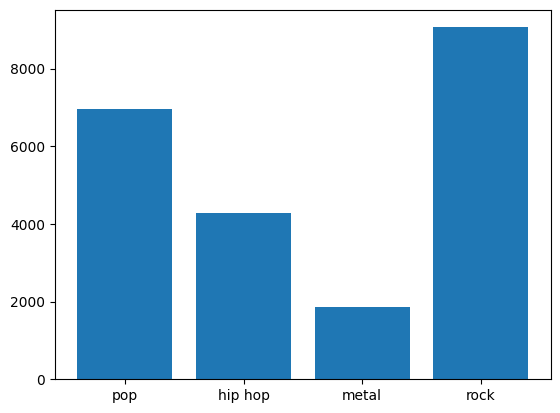

In [48]:
# VISUALIZATION for Query 19 - show count of pop, rock, metal and hip hop singers
plts.bar(labels, counts)
plts.show()